In [44]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import cv2
import math

In [ ]:
label_path = "data/label/result_2018_03_step2.csv"
image_path = "data/2018-03-01"

img_prefix = "SVL_2018.03.01"
img_suffix_left = "_L.jpg"
img_suffix_right = "_R.jpg"

In [ ]:
labels_for_file

In [ ]:
# example file ID
#file_id = "Rectified_TN_Exif_SVL_2018.03.01_01.31.19_Remos-1"
#file_id = "Rectified_TN_Exif_SVL_2018.03.03_20.31.20_Remos-1"
file_id = "Rectified_TN_Exif_SVL_2018.03.03_01.01.20_Remos-1"

# load labels
labels = pd.read_csv(label_path, sep=';')
labels_for_file = labels[labels['file_id'] == file_id]

# original image
#img_path = map_fileId_to_left_image(file_id)[1]
# rectified image
img_path = "data/2018-03-03/rectified/" + file_id + "_L.jpg"


plt.rcParams['figure.figsize'] = 18, 27
print(img_path)
showImageWithAnnotation(img_path, labels_for_file)

In [ ]:
# mapping file-if to image file
# ? why is the reference here to a rectified image? are the coordinates on a rectified one?
#Rectified_TN_Exif_SVL_2018.03.01_01.31.19_Remos-1

def map_fileId_to_left_image(file_id):
    temp = file_id.split('SVL_')
    temp = temp[1].split('_')
    
    date = temp[0]
    time = temp[1]
    observatory = temp[2]
        
    # the date is the folder name, e.g. 2018.03.01
    folder_path = "data/" + date.replace('.', '-')
    img_path = folder_path + "/SVL_" + date + "_" + time + "_" + observatory + "_L.JPG"
    
    return folder_path, img_path


def showImageWithAnnotation(img_path, label):
    "Shows image located in 'img_path' with the labels from 'label'"
    #image = img_to_array(load_img(img_path))
    image = load_img(img_path)
    plt.imshow(image)
    x1 = label["LX1"]
    y1 = label["LY1"]
    x2 = label["LX2"]
    y2 = label["LY2"]
    plt.scatter (x1, y1, marker="x", c="black")
    plt.scatter (x2, y2, marker="o", c="white")
    
    #plt.savefig('label_and_image_rectified_03_03.png')
    plt.show()



In [30]:
import h5py
id = 110
img_path = "G:/Universität/UniBremen/Semester4/Data/maritime_dataset/training_data_animals/"+str(id)+".jpg"
p = "G:/Universität/UniBremen/Semester4/Data/maritime_dataset/labels.h5"
f = h5py.File(p, 'r')
image = (load_img(img_path))
plt.rcParams['figure.figsize'] = 18, 27

In [31]:
list(f.keys())

['test_labels', 'training_labels_animals', 'training_labels_no_animals']

In [32]:
t = f['test_labels']
ta = f['training_labels_animals']
tn = f['training_labels_no_animals']

In [33]:
print(f"t:  {t.shape}\nta: {ta.shape}\ntn: {tn.shape}")

t:  (983, 89, 133, 10)
ta: (1452, 89, 133, 10)
tn: (7401, 89, 133, 10)


In [34]:
ta[0].shape

(89, 133, 10)

limahe shape (2848, 4272, 3)


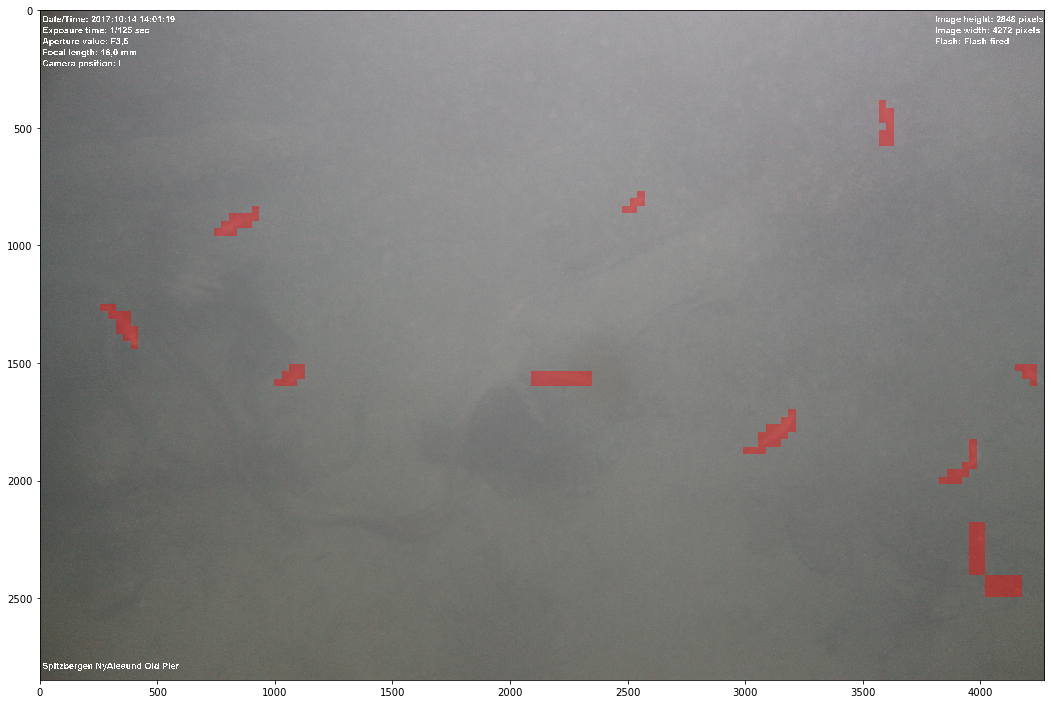

(2848, 4272, 3)


In [35]:
ig = show_labeled(image, ta[id])
print(ig.shape)

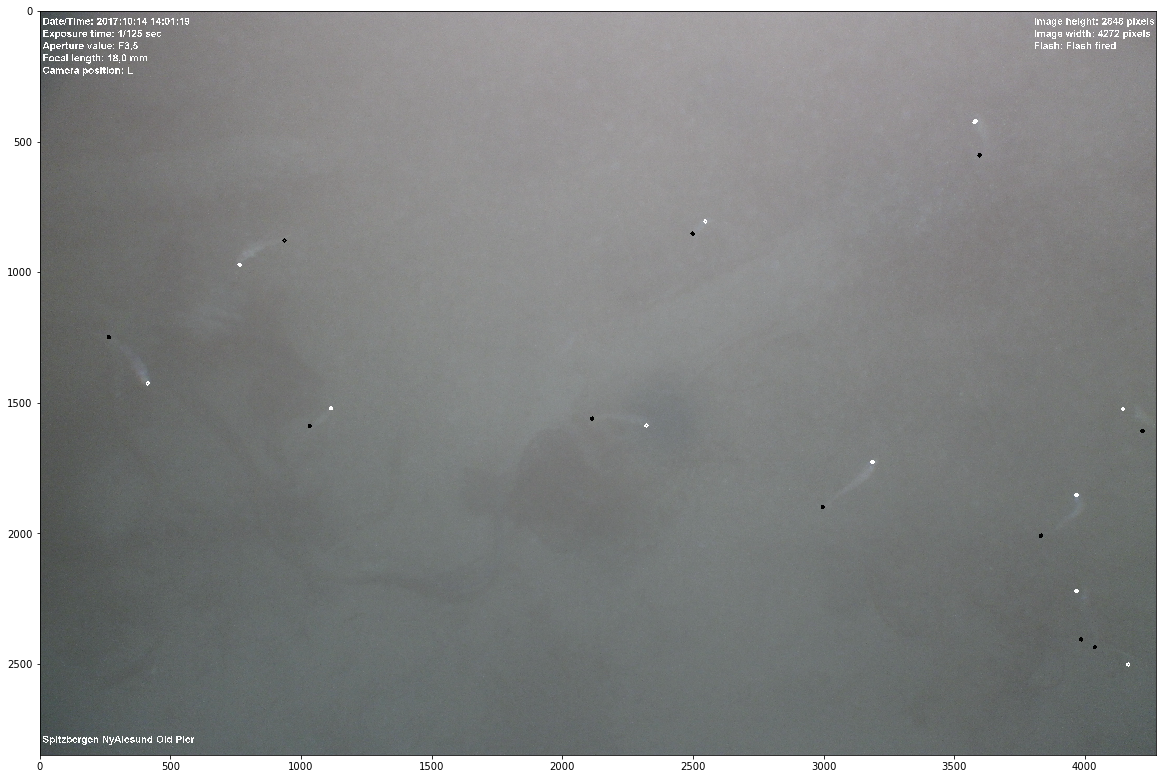

[[3577, 425], [3580, 420], [2546, 805], [764, 971], [412, 1425], [1113, 1520], [4145, 1523], [2321, 1587], [3186, 1726], [3967, 1852], [3968, 2220], [4165, 2501]]
[[3597, 550], [3596, 553], [2498, 852], [936, 878], [263, 1248], [1032, 1588], [4220, 1607], [2113, 1560], [2996, 1898], [3831, 2008], [3984, 2405], [4037, 2435]]


In [36]:
i, pos_f, pos_b, groups = draw_labeled(image, ta[id])
printImg(i)

print(pos_f)
print(pos_b)

In [37]:
len(groups)

12

In [50]:
# extract group and position from Timo's data
import json

json_file = []

# iterate over all labels from training_data_animals
for i in range(len(ta)):
#for i in range(5):
    print(str(i))
    img_path = "G:/Universität/UniBremen/Semester4/Data/maritime_dataset/training_data_animals/"+str(i)+".jpg"
    #img_path = "G:/Universität/UniBremen/Semester4/Data/maritime_dataset/test_data/"+str(i)+".jpg"
    #img_path = "../data/maritime_dataset/training_data_no_animals/"+str(i)+".jpg"
    image = (load_img(img_path))
    i, pos_f, pos_b, groups = draw_labeled(image, ta[i])
    
    animal_list = []
    for j in range(len(groups)): 
        #print(groups[j])
        temp = {}
        temp["group"] = groups[j].tolist()
        temp["front"] = [int(s) for s in  pos_f[j]] 
        temp["back"] = [int(s) for s in pos_b[j]] 
        
        animal_list.append(temp)
    
    obj={}
    obj["filename"] = img_path
    obj["animals"] = animal_list
    
    json_file.append(obj)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [51]:
len(json_file)

1452

In [ ]:
with open('training_labels_animals.json', 'w') as f:
#with open('training_labels_no_animals.json', 'w') as f:
#with open('test_labels.json', 'w') as f:
#with open('validation_labels.json', 'w') as f:
    json.dump(json_file, f)

# for testing
# data = {}
# with open('training_data_animals.json', 'r') as f:
#     data = json.load(f)
# data

## Validation Data

In [73]:
# this section calculates the validation dataset (takes 5% of the train images of every class for this and removes duplicates)
label_path = "../data/maritime_dataset/labels/training_labels_animals.json"
#label_path = "../data/maritime_dataset/labels/normal/training_labels_animals.json"
#label_path = "../data/maritime_dataset_25/labels/training_labels_animals.json"
#label_path = "../data/maritime_dataset_25/labels/normal/training_labels_animals.json"

with open(label_path, 'r') as f:
    train_labels_animals = json.load(f)

fish_id = [0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
train_fish_labels = filter_labels_for_animal_group(train_labels_animals, fish_id)

crust_id =          [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
train_crust_labels = filter_labels_for_animal_group(train_labels_animals, crust_id)

chaetognatha_id =   [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
train_chaeto_labels = filter_labels_for_animal_group(train_labels_animals, chaetognatha_id)

unidentified_id =   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]  
train_unidentified_labels = filter_labels_for_animal_group(train_labels_animals, unidentified_id)

jellyfish_id =      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
train_jellyfish_labels = filter_labels_for_animal_group(train_labels_animals, jellyfish_id)

train_ratio = 0.95
len_fish = math.ceil(len(train_fish_labels)*train_ratio)
len_crust = math.ceil(len(train_crust_labels)*train_ratio)
len_chaet = math.ceil(len(train_chaeto_labels)*train_ratio)
len_unid = math.ceil(len(train_unidentified_labels)*train_ratio)
len_jell = math.ceil(len(train_jellyfish_labels)*train_ratio)

train_labels_animals = train_fish_labels[:len_fish] \
                    + train_crust_labels[:len_crust] \
                    + train_chaeto_labels[:len_chaet]  \
                    + train_unidentified_labels[:len_unid] \
                    + train_jellyfish_labels[:len_jell]

val_labels = train_fish_labels[len_fish:] \
            + train_crust_labels[len_crust:] \
            + train_chaeto_labels[len_chaet:] \
            + train_unidentified_labels[len_unid:]  \
            + train_jellyfish_labels[len_jell:]

# remove duplicates (search only the remaining list in every iteration)
train_labels_animals = [i for n, i in enumerate(train_labels_animals) if i not in train_labels_animals[n + 1:]]
val_labels = [i for n, i in enumerate(val_labels) if i not in val_labels[n + 1:]]

# remove images that are in validation_labels
train_labels_animals = [x for x in train_labels_animals if x not in val_labels]

In [74]:
len(val_labels)

76

In [75]:
with open('training_labels_animals.json', 'w') as f:
#with open('training_labels_no_animals.json', 'w') as f:
#with open('test_labels.json', 'w') as f:
#with open('validation_labels.json', 'w') as f:
    json.dump(train_labels_animals, f)
    
with open('validation_labels.json', 'w') as f:
#with open('training_labels_no_animals.json', 'w') as f:
#with open('test_labels.json', 'w') as f:
#with open('validation_labels.json', 'w') as f:
    json.dump(val_labels, f)

In [42]:
def filter_labels_for_animal_group(label_list, animal_id=[0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]):
    filtered_list = []

    for entry in label_list:
        for animal in entry['animals']:
            if animal_id == animal['group']:
                filtered_list.append(entry)
                break
    return filtered_list

In [ ]:
def draw_labeled(baseimg, labelimg, blending=1, drawVectors = False, maxOnly=False):
    """Visualizes the image given by make_labeled.

    = Parameters =
    * baseimg: Numpy Array to draw on, x*y*3 (RGB Image)
    * labelimg: Numpy Array, x*y*class_number+4.
    """
    # Constant magic numbers
    global class_number
    scaling = 32
    s_size = 16
    
    # Make a colored copy of the Base Image to draw on
    img = np.copy(baseimg)
    labelimg = labelimg
    
    #show only max class / one hot encoding
    if maxOnly:
        for l in labelimg:
            for y in l:
                maxi = np.where(y[:6] == np.amax(y[:6]))   
                #print(maxi, type(maxi))
                y[:6] = np.zeros(6)
                y[maxi] = 1.
            
    

    # Upscale the Label-Image to fit the dimensions of img -- and drop the "Empty"-Label completely since it's only useful for the categorical crossentropy.
    limg = cv2.resize(labelimg[:, :, 1:4] + labelimg[:, :, 2:5], (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
 
    # Overlay the original image with the labels. Probably pretty inefficient, but looks the best.
    blendedimg = cv2.addWeighted(img, blending, (limg * 255).astype(img.dtype), 1 - blending, 0)
    overlay_mask = np.sum(limg, axis=2) != 0
    img[overlay_mask] = blendedimg[overlay_mask]

    positions_front = []
    positions_back = []
    groups = []
    
    # Draw the vectors (sadly by iterating over a numpy array)
    vimg = labelimg[:, :, [-4,-3,-2,-1]].astype(np.int) # just take the vector data
    for x in range(vimg.shape[0]):
        for y in range(vimg.shape[1]):
            
            # If the vector is present, draw it using an arrow relative from the cell's center
            if vimg[x, y][0] != 0 or vimg[x, y][1] != 0 and vimg[x, y][2] != 0 or vimg[x, y][3] != 0:
                pos_front_x, pos_front_y = (y * scaling) + s_size, (x * scaling) + s_size
                pos_back_x, pos_back_y = (y * scaling) + s_size, (x * scaling) + s_size
                if drawVectors: 
                    cv2.arrowedLine(img,
                                    (pos_front_x, pos_front_y),
                                    (pos_front_x + vimg[x, y][0], pos_front_y + vimg[x, y][1]),
                                    (255, 255, 255))
                    cv2.arrowedLine(img,
                                    (pos_back_x, pos_back_y),
                                    (pos_back_x + vimg[x, y][2], pos_back_y + vimg[x, y][3]),
                                    (0, 0, 0))
                else:  
                    cv2.circle(img,(pos_front_x + vimg[x, y][0], pos_front_y + vimg[x, y][1]), 5, (255,255,255), 6)
                    cv2.circle(img,(pos_back_x + vimg[x, y][2], pos_back_y + vimg[x, y][3]), 5, (0,0,0), 6)
                    x_pos_f = pos_front_x + vimg[x, y][0]
                    y_pos_f = pos_front_y + vimg[x, y][1]
                    x_pos_b = pos_back_x + vimg[x, y][2]
                    y_pos_b = pos_back_y + vimg[x, y][3]
                    
                    if [x_pos_f, y_pos_f] not in positions_front and [x_pos_b, y_pos_b] not in positions_back: 
                        positions_front.append([x_pos_f, y_pos_f])
                        positions_back.append([x_pos_b, y_pos_b])
                        groups.append(labelimg[x,y,0:6])
            
    return img, positions_front, positions_back, groups


In [ ]:
#prints cv mat via matplotview
def printImg(img):
    b,g,r = cv2.split(img)
    frame_rgb = cv2.merge((r,g,b))
    plt.figure(figsize=(20,15))
    plt.imshow(frame_rgb)
   # plt.title('Matplotlib') #Give this plot a title
    plt.show()
    

In [ ]:
def show_labeled(baseimg, labelimg, blending=0.6):
    """Visualizes the image given by make_labeled.

    = Parameters =
    * baseimg: Numpy Array to draw on, x*y*3 (RGB Image)
    * labelimg: Numpy Array, x*y*6.
    """
    # Constant magic numbers
    scaling = 32
    s_size = 16

    # Make a colored copy of the Base Image to draw on
    img = np.copy(baseimg)

    # Upscale the Label-Image to fit the dimensions of img -- and drop the "Empty"-Label completely since it's only useful for the categorical crossentropy.
    limg = cv2.resize(labelimg[:, :, 1:4], (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
    print(f"limahe shape {limg.shape}")
    
    # Overlay the original image with the labels. Probably pretty inefficient, but looks the best.
    blendedimg = cv2.addWeighted(img, blending, (limg * 255).astype(img.dtype), 1 - blending, 0)
    overlay_mask = np.sum(limg, axis=2) != 0
    img[overlay_mask] = blendedimg[overlay_mask]

    # Draw the vectors (sadly by iterating over a numpy array)
#     vimg = labelimg[:, :, [4,5]].astype(np.int) # just take the vector data
#     for x in range(vimg.shape[0]):
#         for y in range(vimg.shape[1]):
#             # If the vector is present, draw it using an arrow relative from the cell's center
#             if vimg[x, y][0] != 0 or vimg[x, y][1] != 0:
#                 pos_x, pos_y = (y * scaling) + s_size, (x * scaling) + s_size
#                 cv2.arrowedLine(img,
#                                 (pos_x, pos_y),
#                                 (pos_x + vimg[x, y][0], pos_y + vimg[x, y][1]),
#                                 (0, 0, 0))

    # Done, show it
    plt.imshow(img) # labels as rgb (r = reif, g = unreif, b = matschig)
    plt.show()
    
    return img